<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#The-purpose-of-this-program-is-creating-two-functions:" data-toc-modified-id="The-purpose-of-this-program-is-creating-two-functions:-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>The purpose of this program is creating two functions:</a></span></li></ul></li><li><span><a href="#import-data" data-toc-modified-id="import-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import data</a></span></li></ul></div>

#### The purpose of this program is creating two functions:
The first one, learns with the train data and splits data in *n* groups with the same length, and applies these intervals to the test data.
The second one draw the plot with this information.

So, we can see if the behaviour of the groups is the same in both datas.
It's useful when the application of the model is in all the data, in different thresholds.

### import data

In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

In [2]:
dados1 = pd.read_csv('teste1.csv',sep=';',decimal=',')
dados2 = pd.read_csv('teste2.csv',sep=';',decimal=',')

In [20]:
print(dados1.head(4))
print(dados2.head(4))

    Id  prob_treino  prob_resp
0  121          0.1          1
1  112          0.1          1
2   41          0.1          1
3  173          0.1          1
   Id  prob_teste  pred_teste
0   1    0.641170           1
1   2    0.546631           1
2   3    0.239751           1
3   4    0.869883           1


In [29]:
def probability_groups (n_groups, train_probs, y_train, test_probs, y_test):
    ser, bins = pd.qcut(train_probs, n_groups, retbins = True)
    bins2 = bins.copy()
    bins2[0] = 0
    bins2[n_groups] = 1
    train_table = pd.DataFrame(pd.crosstab(ser, y_train))
    train_table.columns = ['N_0', 'N_1']
    train_table['total'] = train_table.N_0 + train_table.N_1
    train_table['P_1'] = np.round(train_table['N_1'] / train_table['total'],2)
    train_table['P_0'] = np.round(train_table['N_0'] / train_table['total'],2)

    train_table['P_total'] = np.round((train_table['total'] / sum(train_table.total) ), 2)
    train_group = ser.copy()
    
    test_group = pd.cut(test_probs, bins=bins2, labels=False, include_lowest=True)
    test_table = pd.DataFrame(pd.crosstab(test_group, y_test))
    test_table.columns = ['N_0', 'N_1']
    test_table['total'] = test_table.N_0 + test_table.N_1
    test_table['P_1'] = np.round(test_table['N_1'] / test_table['total'],2)
    test_table['P_0'] = np.round(test_table['N_0'] / test_table['total'],2)

    test_table['P_total'] = np.round((test_table['total'] / sum(test_table.total) ), 2)
    
    print ('original bins: {}' .format(bins))
    print ('modified bins: {}' .format(bins2))
    print(test_table)
    return (train_table, test_table, train_group, test_group)

In [30]:
train_table, test_table, train_group, test_group = probability_groups(7, dados1.prob_treino, dados1.prob_resp, dados2.prob_teste, dados2.pred_teste)


original bins: [0.0044222  0.10299859 0.20452673 0.33989183 0.51575841 0.62815722
 0.78905976 0.94410692]
modified bins: [0.         0.10299859 0.20452673 0.33989183 0.51575841 0.62815722
 0.78905976 1.        ]
            N_0  N_1  total   P_1   P_0  P_total
prob_teste                                      
0            11   14     25  0.56  0.44     0.10
1             5   13     18  0.72  0.28     0.07
2             9   18     27  0.67  0.33     0.11
3            19   29     48  0.60  0.40     0.19
4            13   26     39  0.67  0.33     0.16
5             9   33     42  0.79  0.21     0.17
6            13   38     51  0.75  0.25     0.20


In [31]:
train_table = train_table.reset_index()
train_table.rename(columns = {'prob_treino' : 'intervalos'}, inplace=True)

In [53]:
train_table

,intervalos,N_0,N_1,total,P_1,P_0,P_total
0,"(0.0034200000000000003, 0.103]",12,24,36,0.67,0.33,0.14
1,"(0.103, 0.205]",15,21,36,0.58,0.42,0.14
2,"(0.205, 0.34]",12,23,35,0.66,0.34,0.14
3,"(0.34, 0.516]",10,26,36,0.72,0.28,0.14
4,"(0.516, 0.628]",10,25,35,0.71,0.29,0.14
5,"(0.628, 0.789]",9,27,36,0.75,0.25,0.14
6,"(0.789, 0.944]",11,25,36,0.69,0.31,0.14


In [236]:
def stacked_barplot_probs (df,
                           name_axis_x = 'intervalos', 
                           name_cols_plot = ['P_1', 'P_0'], 
                           name_col_2 = 'P_total',
                           colors = ['blue', 'darkblue'],
                           nomes_legenda = ['% Classe 1', '% Classe 0'],
                           ):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    #fig = go.Figure()

    for i in range(len(name_cols_plot)):
        fig.add_trace(
            go.Bar(x=[str(j) for j in df[name_axis_x].values.tolist()] , 
            name = nomes_legenda[i], 
            y=df[name_cols_plot[i]], 
            text = ['{:,.0f}%'.format(i2*100) for i2 in df[name_cols_plot[i]].values.tolist()], 
            textposition='inside',  
            textfont_size=16,
            #orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=2)
            ))
        )
        
    fig.add_trace(go.Scatter(x= [str(j) for j in df[name_axis_x].values.tolist()], 
                             y= df[name_col_2],
                             text = ['{:,.0f}%'.format(i2*100) for i2 in df[name_col_2].values.tolist()],
                             textposition='top center',
                             mode = 'lines+text',
                             marker=dict(color='white'),
                             textfont=dict(
                                #family="sans serif",
                                size=13,
                                color="gray"
                             ),
                            showlegend=False), secondary_y=True)

    
    fig.add_annotation(
        x=6.25,
        y=0.2,
        xref="x",
        yref="y",
        text="% classe 1 geral: 20%",
        showarrow=True,
        font=dict(
            #family="Courier New, monospace",
            #size=16,
            color="white"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=90,
        ay=0,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="gray",
        opacity=0.8
        )
    
    fig.update_layout(barmode='stack',
        title_text="Grafico 2",
        plot_bgcolor='white',
        legend_title=' ',
        xaxis=dict(
            #title='Ggrafico1',
            #titlefont_size=25
            tickfont_size=14,
        ),
        legend=dict(x=0.78, y=0.9)
        #transition_duration=100
    )
    fig['layout']['yaxis1'].update(showticklabels=False,range = [0,1.2],autorange=False)
    fig['layout']['yaxis2'].update(showticklabels=False,range = [-10,2],autorange=False)

    return fig

In [237]:
stacked_barplot_probs(train_table)

In [110]:
# #import matplotlib.pyplot as plt
# #plt.style.use('ggplot')

# def plots_prob_groups (train_table, test_table, figsize_1 = 15, figsize_2= 14, fontsize_inside= 16):

#     tables = [train_table, test_table]
#     fig = plt.figure(figsize=(figsize_1,figsize_2))
#     for index, table in enumerate(tables):
#         ax = fig.add_subplot(2, 1, index+1)
#         #plot
#         A = table.P_1
#         B = 1- table.P_1
#         bar_l = range(len(table.index))
#         bar_width = 0.5
#         #tick_pos = [i + (bar_width / 2) for i in bar_l]

#         ax1 = ax.bar(bar_l, A, width=bar_width,label="A", color="#e87109")
#         ax2 = ax.bar(bar_l, B, bottom = A,width=bar_width,label="B", color="#3842f7")
        
#         # visual elements
#         fontsize_axis = 13
#         ax.set_xlabel("Groups", fontsize=18)
#         ax.set_xticklabels(train_table.index, rotation = 0)
#         ax.set_yticklabels(labels = range(1), color='white')
#         #ax.set_yticks(range(len(train_table.index)))
#         ax.set_xticks(range(len(train_table.index)))
#         ax.legend(['Prob_1','Prob_0'],bbox_to_anchor=(1, 0.9),fontsize=fontsize_axis)
#         plt.yticks(fontsize=fontsize_axis)
#         plt.xticks(fontsize=fontsize_axis)
#         ax.set_ylim(0,1.13)
#         i = 0

#         #plotting texts inside bars
#         for r1, r2 in zip(ax1, ax2):
#             h1 = np.round(r1.get_height(),decimals=2)
#             h2 = np.round(r2.get_height(),decimals=2)
#             plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., h1, ha="center", va="center", color="white", fontsize=fontsize_inside, fontweight="bold")
#             plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 /2., h2, ha="center", va="center", color="white", fontsize=fontsize_inside, fontweight="bold")
#             plt.text(r1.get_x() + r1.get_width() / 2, h1+h2 +0.05, '{:.0%}'.format(np.round(table.P_total[i],2)), ha="center", va="center", color="gray", fontsize=13)
#             i += 1

#     plt.subplots_adjust(wspace=0.2, hspace=0.2)

#     plt.show()
        
       

original bins: [ 0.0044222   0.10299859  0.20452673  0.33989183  0.51575841  0.62815722
  0.78905976  0.94410692]
modified bins: [ 0.          0.10299859  0.20452673  0.33989183  0.51575841  0.62815722
  0.78905976  1.        ]


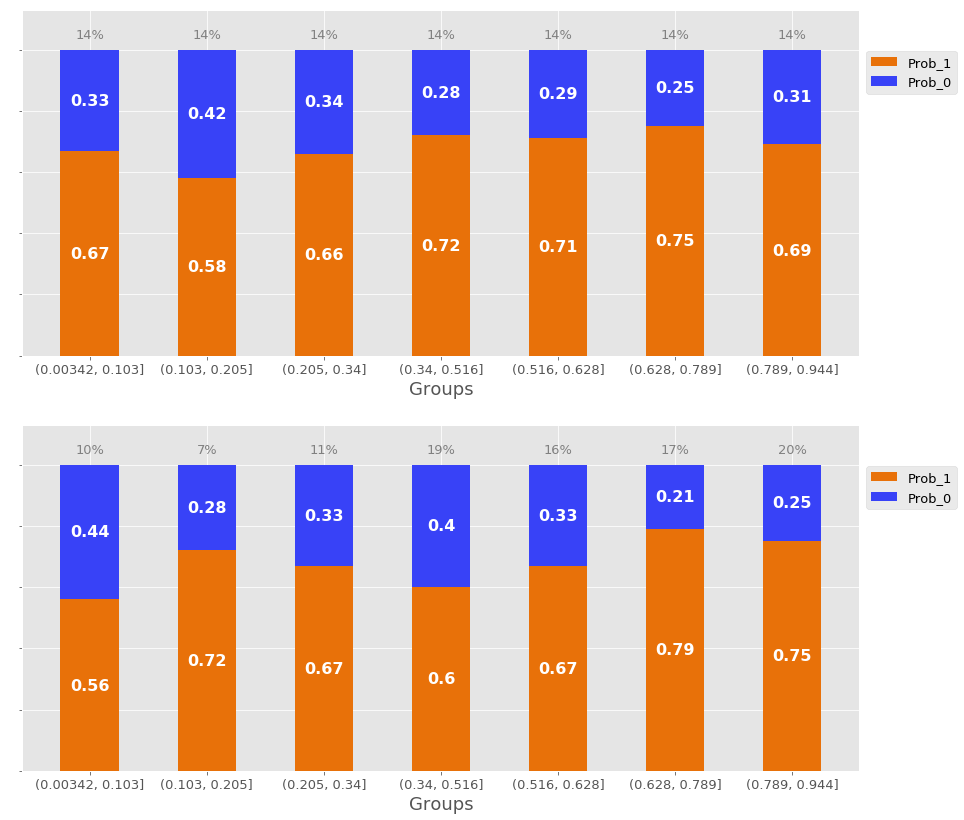

In [111]:
train_table, test_table, train_group, test_group = probability_groups(7, dados1.prob_treino, dados1.prob_resp, dados2.prob_teste, dados2.pred_teste)
plots_prob_groups (train_table, test_table)

In [91]:
print(train_table)
print('\n')
print(test_table)
print('\n')
print(train_group.head())
print('\n')
print(test_group.head())
print('\n')

                  N_0  N_1  total   P_1  P_total
prob_treino                                     
(0.00342, 0.179]   23   40     63  0.63     0.25
(0.179, 0.427]     23   39     62  0.63     0.25
(0.427, 0.666]     14   48     62  0.77     0.25
(0.666, 0.944]     19   44     63  0.70     0.25


            N_0  N_1  total   P_1  P_total
prob_teste                                
0            15   21     36  0.58     0.14
1            18   44     62  0.71     0.25
2            26   43     69  0.62     0.28
3            20   63     83  0.76     0.33


0    (0.00342, 0.179]
1    (0.00342, 0.179]
2    (0.00342, 0.179]
3    (0.00342, 0.179]
4    (0.00342, 0.179]
Name: prob_treino, dtype: category
Categories (4, interval[float64]): [(0.00342, 0.179] < (0.179, 0.427] < (0.427, 0.666] < (0.666, 0.944]]


0    2
1    2
2    1
3    3
4    0
Name: prob_teste, dtype: int64


